In [1]:
# Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/train (1).csv')

In [4]:
# Creating dataframe

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
# Shape of dataframe is 42000, 785

In [8]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [9]:
# Total 10 unique values of 'label'

In [10]:
X = df.drop('label' , axis='columns')
Y = df['label']

import keras
from keras.utils import np_utils


X = np_utils.normalize(X)

Y = np_utils.to_categorical(Y)

In [11]:
# Creating features and labels and optimizing them

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


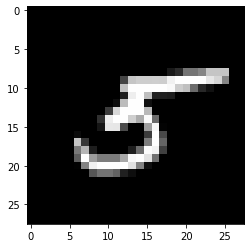

In [12]:
print(Y[80])

import matplotlib.pyplot as plt

plt.imshow(X.values[80].reshape(28,28) , cmap='gray')

plt.show()

In [13]:
# Generating image from index

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [15]:
# Splitting data for testing and training

In [16]:
from keras import models
from keras import layers
model = models.Sequential()


In [17]:
model.add(layers.Dense(1024 , activation='relu' , input_dim=xtrain.shape[1]))      #Intilisation of neural network model
model.add(layers.Dense(512 , activation='relu'))                                   #adding hidden layers into it
model.add(layers.Dense(256 , activation='relu'))                                   #adding hidden layers into it
model.add(layers.Dense(256 , activation='relu'))                                   #adding hidden layers into it
model.add(layers.Dense(128 , activation='relu'))                                   #adding hidden layers into it
model.add(layers.Dense(64 , activation='relu'))                                    #adding hidden layers into it

model.add(layers.Dense(10,activation='sigmoid'))                                   #As label contains 10 unique values so creating 10 output neurons 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                6

In [19]:
from keras import optimizers
from keras import metrics
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(learning_rate = 0.1)     # Increasing learning rate to reduce time required for training
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy' ,
              metrics = ['accuracy'])

In [20]:
# Training model

In [21]:
model.fit(xtrain,ytrain,epochs=5,validation_data = (xtest,ytest))

Epoch 1/5
985/985 [==============================] - 17s 17ms/step - loss: 2.2345 - accuracy: 0.2930 - val_loss: 2.0553 - val_accuracy: 0.4524
Epoch 2/5
985/985 [==============================] - 18s 18ms/step - loss: 1.2137 - accuracy: 0.6493 - val_loss: 0.6559 - val_accuracy: 0.8021
Epoch 3/5
985/985 [==============================] - 17s 17ms/step - loss: 0.5479 - accuracy: 0.8298 - val_loss: 0.4925 - val_accuracy: 0.8493
Epoch 4/5
985/985 [==============================] - 17s 17ms/step - loss: 0.4065 - accuracy: 0.8755 - val_loss: 0.3830 - val_accuracy: 0.8826
Epoch 5/5
985/985 [==============================] - 18s 19ms/step - loss: 0.3379 - accuracy: 0.8970 - val_loss: 0.3848 - val_accuracy: 0.8778


In [22]:
# Calculating Test accuracy

In [23]:
model.evaluate(xtest,ytest)

329/329 [==============================] - 2s 5ms/step - loss: 0.3848 - accuracy: 0.8778


[0.38480016589164734, 0.8778095245361328]

In [24]:
# Predicting Values

In [25]:
np.argmax(model.predict(xtest.values[10].reshape(1,784)))

1

In [26]:
print(ytest[10])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


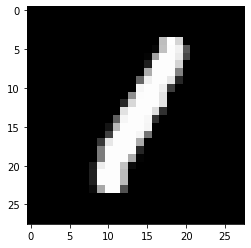

In [27]:
plt.imshow(xtest.values[10].reshape(28,28) , cmap='gray')

plt.show()